# Extra: Regression Trees (A Quick Recap)

Continuous Target Variables 

Lets try predict the body mass of a penguin based on their flipper length.

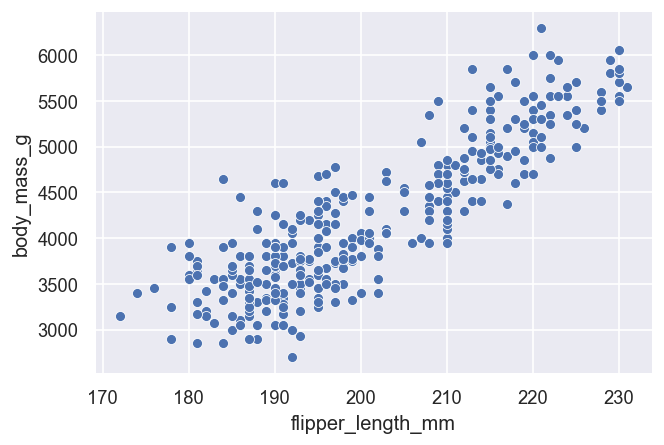

In [8]:
g = sns.scatterplot(data=datasets['flbm']['df'], x = "flipper_length_mm", y = "body_mass_g")
#plt.title("")
plt.show()

As can be seen in the plot below, we split our data up into segments based on the depth of the tree (in the plot below using vertical lines), and given a new data point, we give it an estimated value by averaging the data in that segement (the horizontal line).

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

def plot_regression_predictions(tree_reg, X, y, axes=[170, 235, 2500, 6200], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r-", linewidth=2, label=r"$\hat{y}$")

def reg_plots(X, y, max_depths):

    fig, axes = plt.subplots(ncols=len(max_depths), nrows=2, figsize=(10, 8), sharey=True)

    thresh_dict = dict()
    lin_style_dict = dict()
    alpha=1
    lin_style = ['-', '--', ':']
    for i, depth in enumerate(max_depths):
        tree_reg = DecisionTreeRegressor(random_state=42, max_depth=depth)
        tree_reg.fit(X, y)
        plt.sca(axes[0, i])
        if i == 0:
            plot_regression_predictions(tree_reg, X, y)
        else:
            plot_regression_predictions(tree_reg, X, y, ylabel=None)
        for j in range(len(tree_reg.tree_.threshold)):
            if tree_reg.tree_.threshold[j] == -2:
                continue
            else:
                thresh = tree_reg.tree_.threshold[j]
                if thresh not in thresh_dict.keys():
                    thresh_dict[thresh]= alpha
                    lin_style_dict[thresh] = lin_style[i]
                plt.axvline(x=thresh, color='k', linestyle =lin_style_dict[thresh], alpha=thresh_dict[thresh])
        alpha-=0.2
        plt.legend(loc="upper left", fontsize=10)
        plt.title("max_depth="+str(depth), fontsize=14)

        tp = plot_tree(tree_reg,
                            feature_names=["flipper_length_mm"],
                            filled = True,
                            ax=axes[1, i]
                           )

    plt.show()

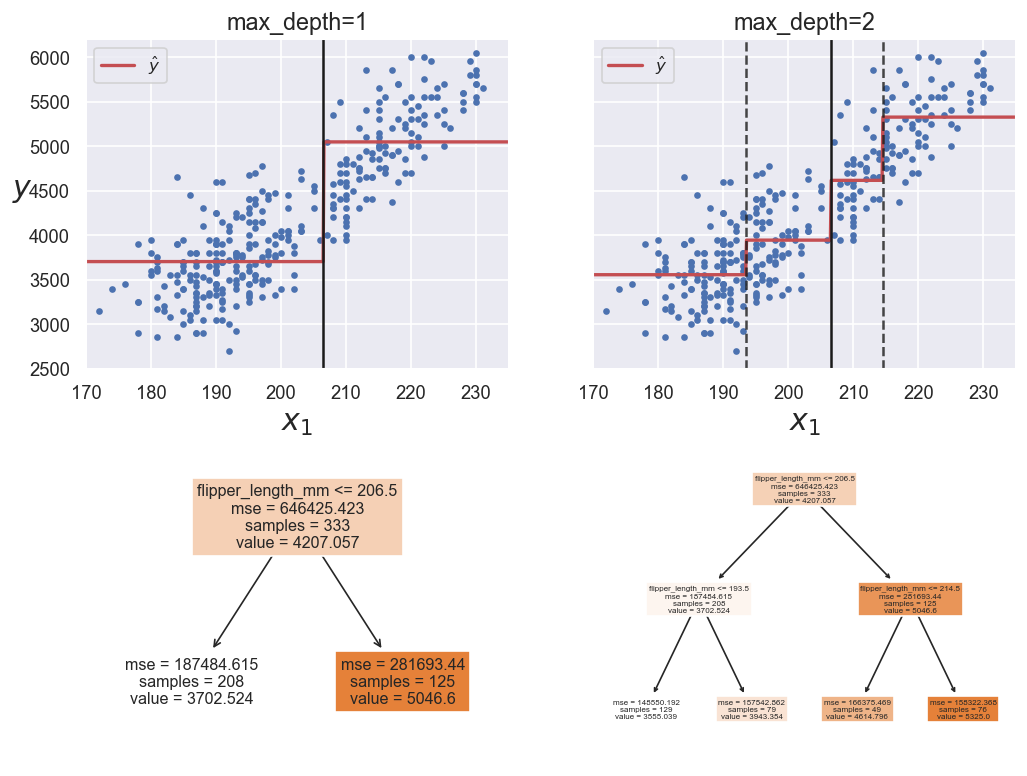

In [10]:
reg_plots(datasets['flbm']['X'], datasets['flbm']['y'], max_depths = [1,2])

In more detail, there are two rough steps to a regression tree:
1. Divide the predictor space (the possible values for $X_1, X_2,...X_p$) into $J$ distinct non-overlapping regions, $R_1, R_2,...,R_j$.
2. For every obersravtion in region $R_j$, we make the same prediction, the mean responce for the training observations in $R_j$.

To construct these regions we divide the space into high-dimensional rectangles (boxes), with the goal to find the boxes $R_1, R_2,...,R_j$ that minimize the residual sum of squares (RSS):

$\sum^J_{j=1}\sum_{i\in R_j}(y_i - \hat y_{R_j})^2$,

where $\hat y_{R_j}$ is the mean responce for the training observations within the $j$th box.

---
James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.

We can't consider every possible partician of the feature space so we use recursive binary splitting (a top-down, greeedy approach). We begin at the top of the tree (all points in one region), and successively split the predictor space using the cutoff, $s$, that leads to the greatest reduction in RSS. In other words, we can define the half-planes as

$R_1(j,s) = \{X|X_j < s\}$ and $R_2(j,s) = \{X|X_j \geq s\}$,

and we seek the value of $j$ and $s$ to minimise

$\sum_{i: x_i\in R_1(j,s)}(y_i-\hat y_{R_1})^2 + \sum_{i: x_i\in R_2(j,s)}(y_i-\hat y_{R_2})^2$.

Provided $P$ is not too large, this can be done quite quickly. 

We then repeat the process, using the previously identified regions, until we reach a stopping criterion.

---
James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.

For another example, lets have more features (P) and see how we can visualise a shallow tree.

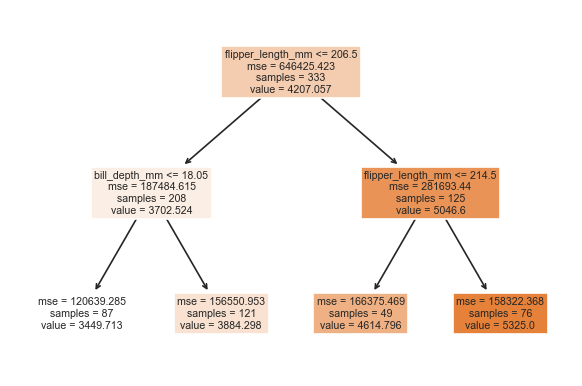

In [11]:
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)

tree_reg.fit(datasets['reg_full']['X'], datasets['reg_full']['y'])

tp = plot_tree(tree_reg,
               feature_names=datasets['reg_full']['feats'],
               filled = True)

__Note__
- Sklearn uses MSE for the splitting criterion which is a standardised version of the RSS
- Rather than limiting the depth `max_depth` or setting a threshold `min_impurity_decrease` for the decrease in impurity, a good option is to use tree pruning `ccp_alpha`. For more on this read from pg. 307 in _An introduction to statistical learning_.

Heres an additional visualisation, where we can follow the path of a hypetetical test sample.

**Notes**
- _"[INSERT QUOTE ABOUT REGRESSION DECISION]"_ https://explained.ai/decision-tree-viz/index.html

In [87]:
from re import search

# Change to True if you want to run the dtreeviz code
DTREEVIS = True

if DTREEVIS:
    if not search("graphviz", os.environ.get('PATH')):
        # CHANGE THIS TO WHERE graphviz IS ON YOUR COMPUTER!
        GRAPHVIS_PATH = 'C:/Users/delliot2/Anaconda3/envs/Teaching/Library/bin/graphviz/'
        os.environ["PATH"] += os.pathsep + GRAPHVIS_PATH

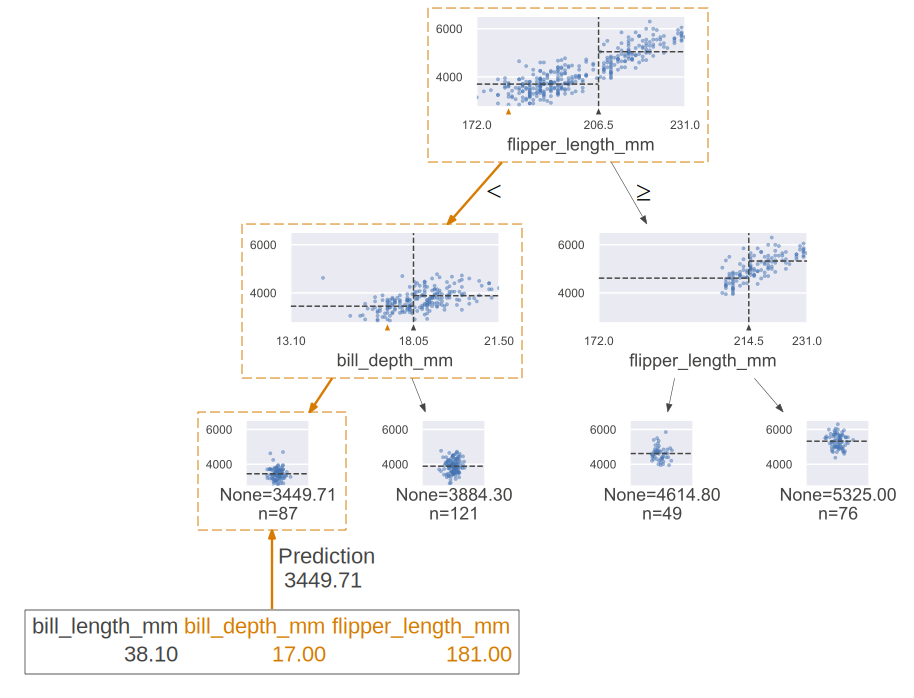

In [13]:
from dtreeviz.trees import dtreeviz
from sklearn.tree import DecisionTreeRegressor

if DTREEVIS:
    np.random.seed(seed=42)

    # random sample from training
    x_ = datasets['reg_full']['X'][np.random.randint(0, len(datasets['reg_full']['X'])),:] 

    viz = dtreeviz(tree_reg, datasets['reg_full']['X'], datasets['reg_full']['y'],
                   feature_names=datasets['reg_full']['feats'], scale=2.0, X=x_)
    display(viz)

# References
1. James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.
2. Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081
3. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
4. Raschka, Sebastian, and Vahid Mirjalili. Python Machine Learning, 2nd Ed. Packt Publishing, 2017.